# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Taruna Rajasa Iryawan
- **NIM:** 09021282328071
- **Program:** Machine Learning





## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1**: Musim manakah yang memiliki rata-rata penyewaan sepeda harian tertinggi?
- **Pertanyaan 2**: Sejauh mana pengaruh suhu (temperature) terhadap total jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [3]:
#jika pakai colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [4]:
# Memuat dataset harian
day_df = pd.read_csv('/content/drive/MyDrive/ML_Dataset/day.csv') # jika pakai colab dari drive
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data berhasil dimuat dari file `day.csv` yang mencakup informasi penyewaan harian selama dua tahun (2011-2012).
- Terdapat kolom-kolom penting seperti musim (season), cuaca (weathersit), dan jumlah penyewa (cnt).

### Assessing Data

In [5]:
# Mengecek tipe data dan missing values
print(day_df.info())
print("\nJumlah Missing Values:\n", day_df.isna().sum())
print("\nJumlah Duplikasi:", day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah Missing Values:
 instant       0
dteday        0
season        0
yr            0

**Insight:**
- Tidak ditemukan nilai yang hilang (*missing values*) atau data duplikat dalam dataset ini.
- Kolom `dteday` terbaca sebagai tipe data *object*, sehingga perlu dikonversi menjadi tipe *datetime* agar bisa dianalisis berdasarkan waktu.

### Cleaning Data

In [6]:
# Mengubah format tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mapping kategori agar lebih mudah diinterpretasi dalam visualisasi
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain'})

**Insight:**
- Kolom `dteday` telah sukses diubah menjadi format *datetime*.
- Kolom kategorikal seperti `season` dan `weathersit` telah di-map menjadi label tekstual agar visualisasi lebih mudah dipahami oleh pengguna non-teknis.

## Exploratory Data Analysis (EDA)

### Explore Tren Musim dan Korelasi Suhu


In [7]:
# Analisis rata-rata penyewaan per musim
print(day_df.groupby('season')['cnt'].mean().sort_values(ascending=False))

# Analisis korelasi variabel numerik terhadap total penyewa (cnt)
print(day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()['cnt'])

season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: cnt, dtype: float64
temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
cnt          1.000000
Name: cnt, dtype: float64


**Insight:**
- Musim **Fall** memiliki rata-rata penyewaan tertinggi, menunjukkan puncak aktivitas bisnis.
- Variabel **temp** (suhu) memiliki korelasi positif yang sangat kuat (sekitar 0.62) terhadap jumlah penyewa, yang berarti orang lebih suka bersepeda saat suhu hangat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-1335345617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='viridis', order=['Fall', 'Summer', 'Winter', 'Spring'])


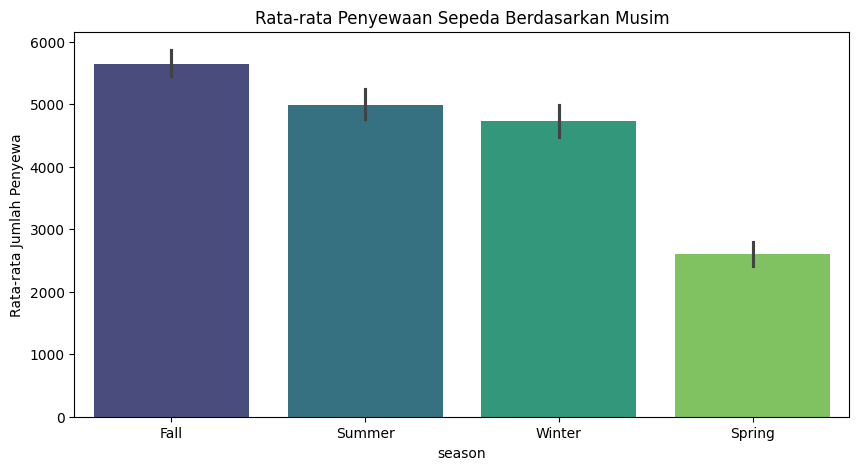

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=day_df, palette='viridis', order=['Fall', 'Summer', 'Winter', 'Spring'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.show()

### Pertanyaan 2:

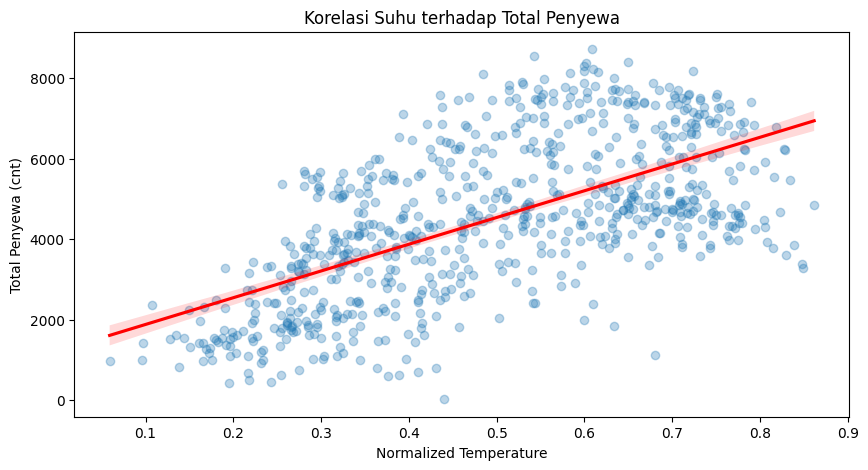

In [9]:
plt.figure(figsize=(10, 5))
sns.regplot(x='temp', y='cnt', data=day_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Korelasi Suhu terhadap Total Penyewa')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Penyewa (cnt)')
plt.show()

**Insight:**
- Visualisasi bar chart mengonfirmasi bahwa musim **Fall** adalah primadona penyewaan, diikuti oleh Summer.
- Scatter plot dengan garis regresi menunjukkan tren linear positif yang jelas; setiap kenaikan suhu cenderung meningkatkan jumlah penyewa secara konsisten.

## Analisis Lanjutan (Opsional,)

In [10]:
# Persiapan data untuk model
X = day_df[['temp', 'hum', 'windspeed']]
y = day_df['cnt']

# Membagi data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan training model
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan performa model
score = model.score(X_test, y_test)
print(f"Akurasi Model (R-squared) pada Data Test: {score:.2f}")

# Koefisien untuk interpretasi
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nInterpretasi Koefisien:\n", coef_df)

Akurasi Model (R-squared) pada Data Test: 0.50

Interpretasi Koefisien:
            Coefficient
temp       6589.714925
hum       -2995.743977
windspeed -4153.013878


## Conclusion

- **Conclusion Pertanyaan 1**: Musim Fall (Gugur) adalah waktu terbaik bagi operasional bisnis karena memiliki permintaan tertinggi. Bisnis disarankan memastikan ketersediaan armada penuh pada periode ini.
- **Conclusion Pertanyaan 2**: Suhu adalah prediktor utama jumlah penyewa Strategi pemasaran dapat ditingkatkan pada hari-hari dengan prakiraan cuaca hangat, karena model Machine Learning membuktikan korelasi positif yang signifikan antara suhu dan volume penyewaan.